# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +27.92350388248                   -1.40    5.33s
  2   +19.36731245593        0.93       -0.80   11.9ms
  3   +12.64483587191        0.83       -0.42   11.7ms
  4   +11.88002674675       -0.12       -0.54   9.56ms
  5   +10.82564948686        0.02       -0.73   9.56ms
  6   +10.03547139180       -0.10       -0.83   9.46ms
  7   +9.312717501642       -0.14       -0.89   9.54ms
  8   +8.775919651618       -0.27       -0.85   9.53ms
  9   +8.577509136746       -0.70       -0.81   9.53ms
 10   +8.463894385302       -0.94       -0.95   9.47ms
 11   +8.432937152397       -1.51       -1.01   48.5ms
 12   +8.369685559921       -1.20       -1.05   7.64ms
 13   +8.317890709844       -1.29       -1.03   7.37ms
 14   +8.233111785307       -1.07       -0.98   9.56ms
 15   +8.150818502678       -1.08       -0.91   9.53ms
 16   +8.085985462275       -1.19       -0.98   9.60ms
 17   +8.01

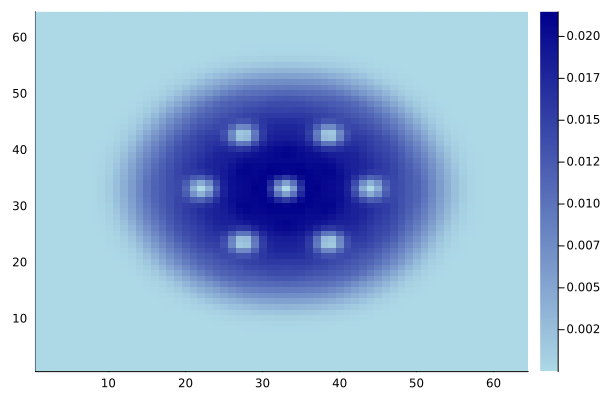

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)